In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
path = os.getcwd()
data_path = 'C:\\Users\\sunil\\Projects\\Dockship\\Exam Mark Prediction\\Dataset'
sub_path = 'C:\\Users\\sunil\\Projects\\Dockship\\Exam Mark Prediction\\Submissions'

#### Preprocessing ####
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
scaler = MinMaxScaler()

#### Models ####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

#### Evaluation ####
from sklearn.metrics import mean_squared_error

In [479]:
train = pd.read_csv(data_path+ '\\train.csv')
test = pd.read_csv(data_path+ '\\test.csv')
sample_sub = pd.read_csv(data_path+ '\\sample_submissions.csv')

In [480]:
train.drop('Unnamed: 0', axis = 1, inplace=True)

In [481]:
test.drop('Unnamed: 0', axis = 1, inplace=True)

---
# Preprocessing

In [492]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [493]:
target = 'math score'

cat_cols = ['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', ]

num_cols = ['reading score', 'writing score']

In [502]:
#df[cat_cols] = df[cat_cols].apply(le.fit_transform)

df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [495]:
#df[num_cols] = scaler.fit_transform(df[num_cols])""

---
# Train Test Split

In [496]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop=True)

In [497]:
features = [col for col in test_proc.columns if col not in [target]]

In [498]:
trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 1999)

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test_proc[features]

In [499]:
model_dict = {}

model_dict['Linear Regression'] = LinearRegression(normalize=True)
model_dict['Lasso'] = ElasticNet()
model_dict['Ridge'] = Ridge()
model_dict['SVM'] = SVR()
model_dict['Decision Tree'] = DecisionTreeRegressor(random_state = 1)
model_dict['Extra Trees'] = ExtraTreesRegressor(random_state = 1)
model_dict['KNN'] = KNeighborsRegressor()
model_dict['MLPRegressor'] = MLPRegressor(hidden_layer_sizes = (1000), max_iter=1000)
model_dict['Random Forest'] = RandomForestRegressor(random_state = 1)
model_dict['AdaBoost'] = AdaBoostRegressor(random_state = 1)
model_dict['Bagging'] = BaggingRegressor(random_state = 1)
model_dict['XGBoost'] = XGBRegressor(random_state = 1)
model_dict['LGBM'] = LGBMRegressor(random_state = 1)
model_dict['Cat'] = CatBoostRegressor(verbose=False, random_state =1)
model_dict['Bagging'] = BaggingRegressor(random_state = 1)
model_dict['GB'] = GradientBoostingRegressor(verbose=False, random_state =1)

In [500]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.sqrt(mean_squared_error(y_test, y_pred))
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    print()

In [477]:
for model_name,model in model_dict.items():
    model_test(X_trn, X_val, y_trn, y_val, model, model_name)

======================================Linear Regression=======================================
Score is : 5.012298925911026

======================================Lasso=======================================
Score is : 6.9932278131983665

======================================Ridge=======================================
Score is : 5.002227061855754

======================================SVM=======================================
Score is : 9.068147739340922

======================================Decision Tree=======================================
Score is : 8.571964268974261

======================================Extra Trees=======================================
Score is : 5.874301903813154

======================================KNN=======================================
Score is : 8.942514826857792

======================================MLPRegressor=======================================
Score is : 5.343685108396229

======================================Random Forest===============

In [396]:
model = Ridge()

model.fit(train_proc[features], train_proc[target])

preds = model.predict(X_test)

In [397]:
sample_sub[target] = np.round((preds))

In [398]:
sample_sub.to_csv(sub_path + '\\sub1.csv', index=False)

---
# EDA

# Hypothesis Genration

**1. Where the test_score is completed, the math score is high.**

**2. If the parent education is high, math score is high.**

**3. If reading and writing scores are above 80, then math score is above 75.**

**4. If lunch is standard, the math score is high.**

**5. Group A---> High Score --------> Group E---> Least Score. i.e. A>B>C>D>E.**

**6. Median math score of Male is greater than Female.**

## Basic Look at Dataset

1. Brief Look at the Dataset
2. See the shape of Dataset. Variables and Target column
3. Target Distribution
4. See the variables datatypes
5. See The Number/Percentage Of Missing values
6. Unique Values in each Variable

**1. Brief Look at the Dataset**

In [173]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,700.0,349.500000,202.216880,0.0,174.75,349.5,524.25,699.0
reading score,700.0,69.751429,14.600877,23.0,60.00,70.0,80.00,100.0
writing score,700.0,68.497143,15.224265,15.0,58.00,70.0,79.00,100.0
math score,700.0,66.442857,15.249227,8.0,57.00,66.5,77.00,100.0


In [174]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300.0,149.50,86.746758,0.0,74.75,149.5,224.25,299.0
reading score,300.0,67.81,14.532189,17.0,58.00,69.0,78.00,100.0
writing score,300.0,67.02,15.103421,10.0,57.00,68.0,77.25,100.0


**2. See the shape of Dataset. Variables and Target column**

In [175]:
print(f'The shape of train is {train.shape}')
print(f'The shape of test is {test.shape}')

target = 'math score' # Target Variable

features = [col for col in train.columns if col not in [target]] # Features

print(f'\nThe Dataset have total {len(features)} features')

The shape of train is (700, 9)
The shape of test is (300, 8)

The Dataset have total 8 features


**3. Target Distribution**

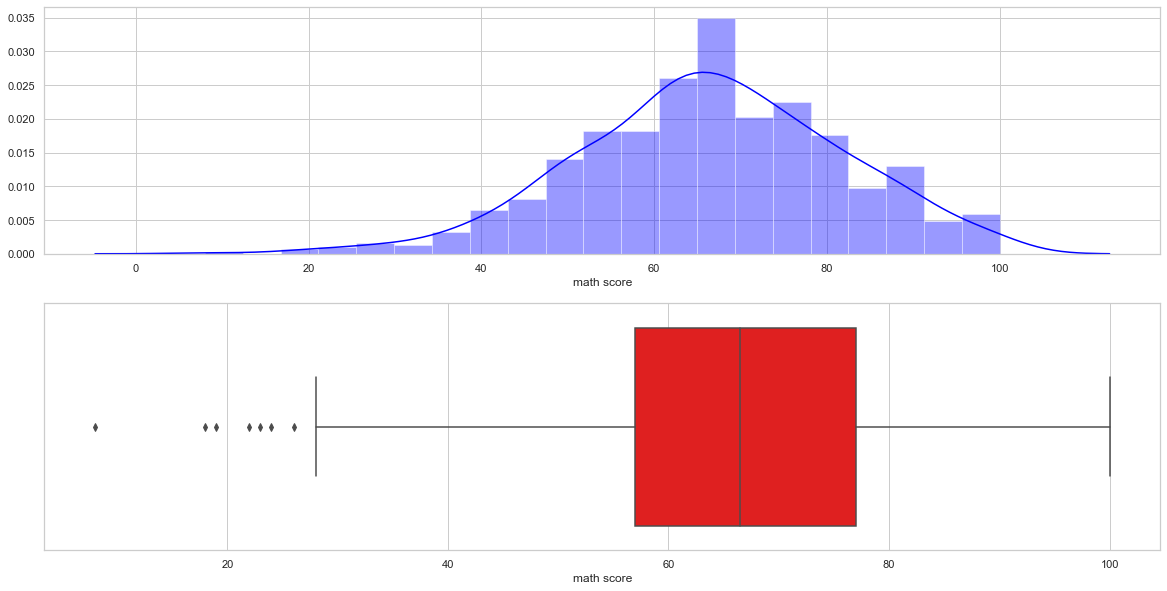

In [177]:
f, ax = plt.subplots(2, 1, figsize=(20, 10))
axx = ax.flatten()

sns.distplot(train[target], color='blue', ax = axx[0])
sns.boxplot(train[target], color='red', ax = axx[1])

**4. See the variables datatypes**

In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   700 non-null    int64 
 1   gender                       700 non-null    object
 2   ethnicity                    700 non-null    object
 3   parental level of education  700 non-null    object
 4   lunch                        700 non-null    object
 5   test preparation course      700 non-null    object
 6   reading score                700 non-null    int64 
 7   writing score                700 non-null    int64 
 8   math score                   700 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 49.3+ KB


**5. See The Number/Percentage Of Missing values**

In [179]:
train.isna().sum()

Unnamed: 0                     0
gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score                     0
dtype: int64

In [180]:
test.isna().sum()

Unnamed: 0                     0
gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
dtype: int64

**6. Unique Values in each Variable**

In [183]:
pd.concat((train.nunique(), test.nunique()), axis = 1)

,0,1
Unnamed: 0,700,300.0
gender,2,2.0
ethnicity,5,5.0
parental level of education,6,6.0
lunch,2,2.0
test preparation course,2,2.0
reading score,70,60.0
writing score,73,68.0
math score,77,NaN


---
# Univariate Anlysis

**1. Pie plots for categorical Variables**

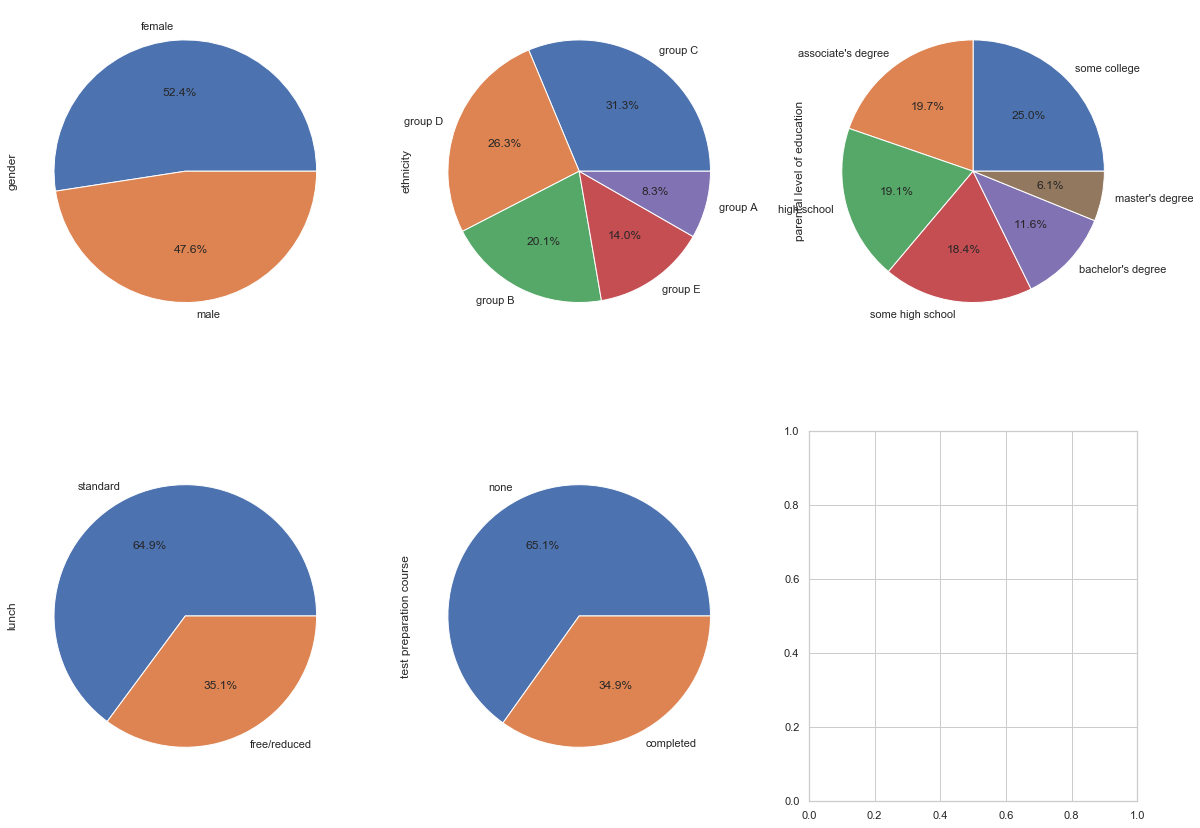

In [189]:
f, ax = plt.subplots(2, 3, figsize = (20, 15))
axx = ax.flatten()

for i, col in enumerate(cat_cols):
    train[col].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[i])

**2. Countplots for Categorical Variables**

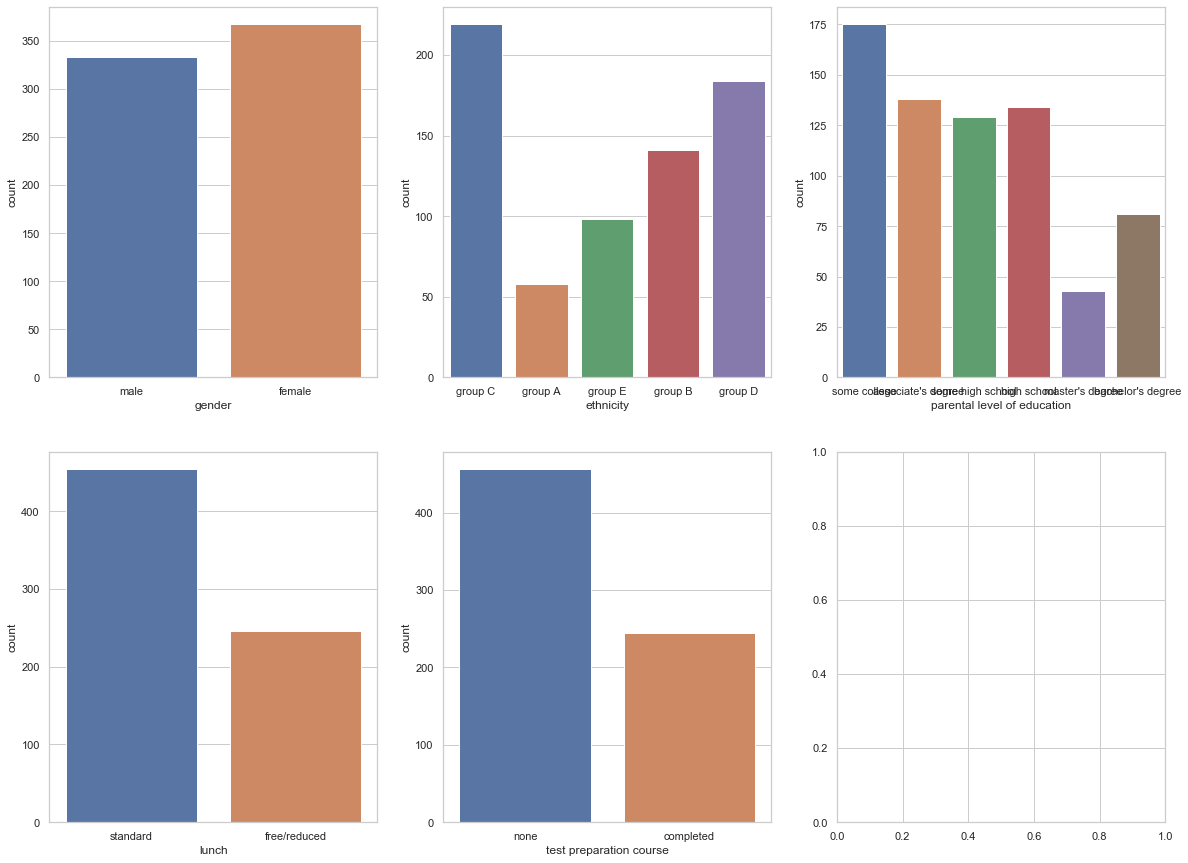

In [190]:
f, ax = plt.subplots(2, 3, figsize = (20, 15))
axx = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(train[col], ax = axx[i])

**Boxplots for Numerical Columns**

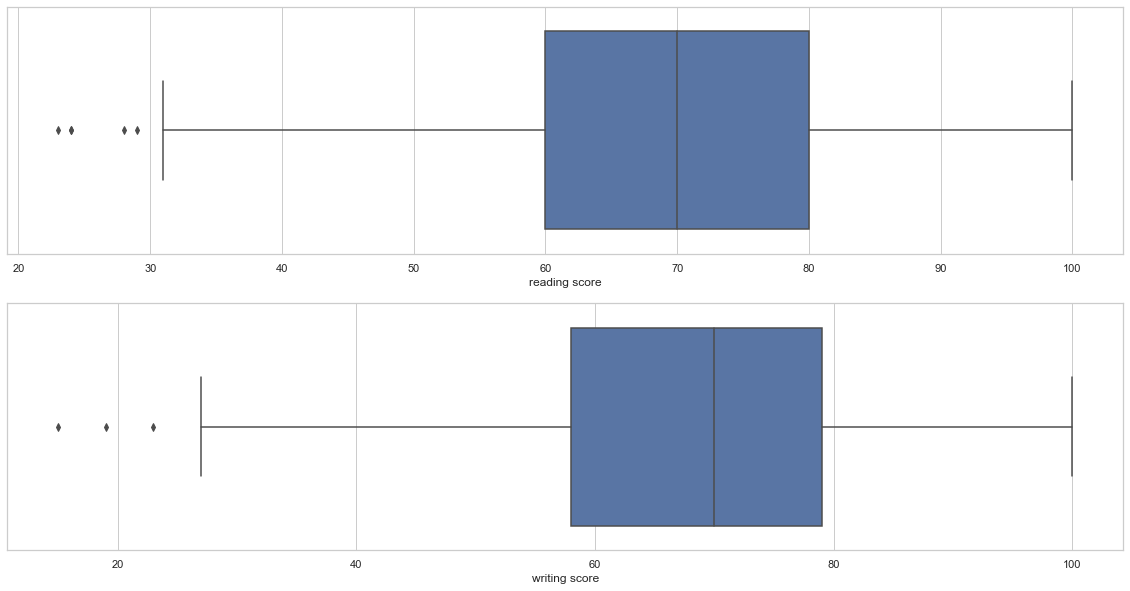

In [194]:
f, ax = plt.subplots(2, 1, figsize = (20, 10))
axx = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(train[col], ax = axx[i])

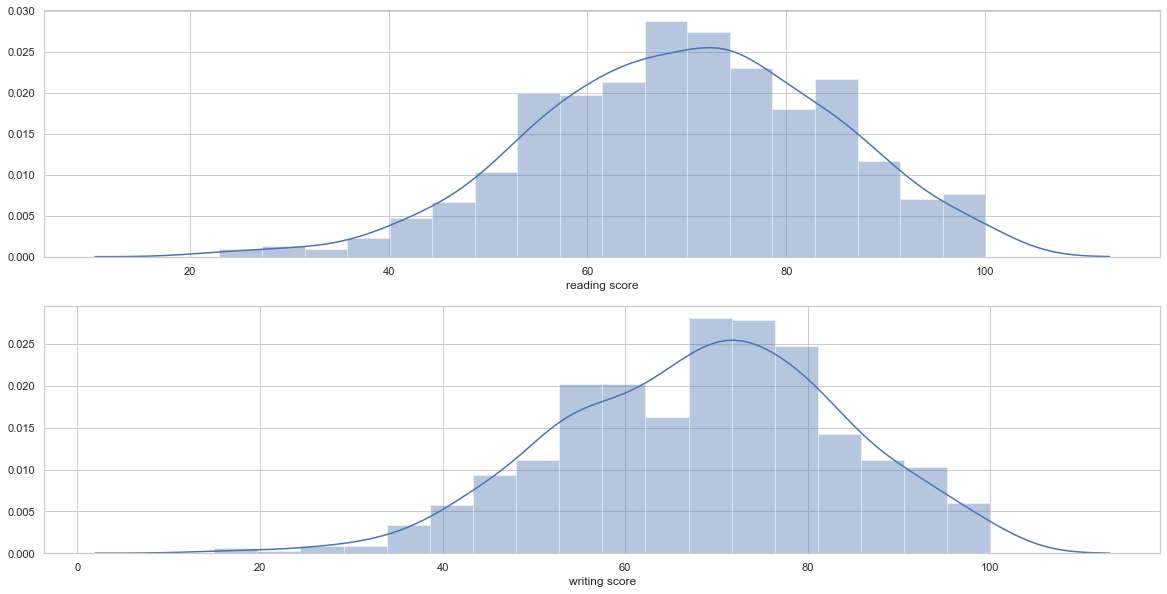

In [195]:
f, ax = plt.subplots(2, 1, figsize = (20, 10))
axx = ax.flatten()

for i, col in enumerate(num_cols):
    sns.distplot(train[col], ax = axx[i])

---
# Bivariate Analysis

<Figure size 1440x1440 with 0 Axes>

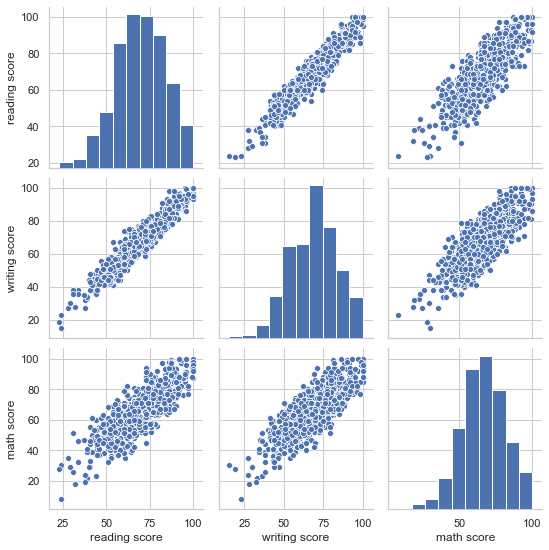

In [210]:
plt.figure(figsize = (20, 20))
sns.pairplot(train)

**Categorical Column with Target Variable**

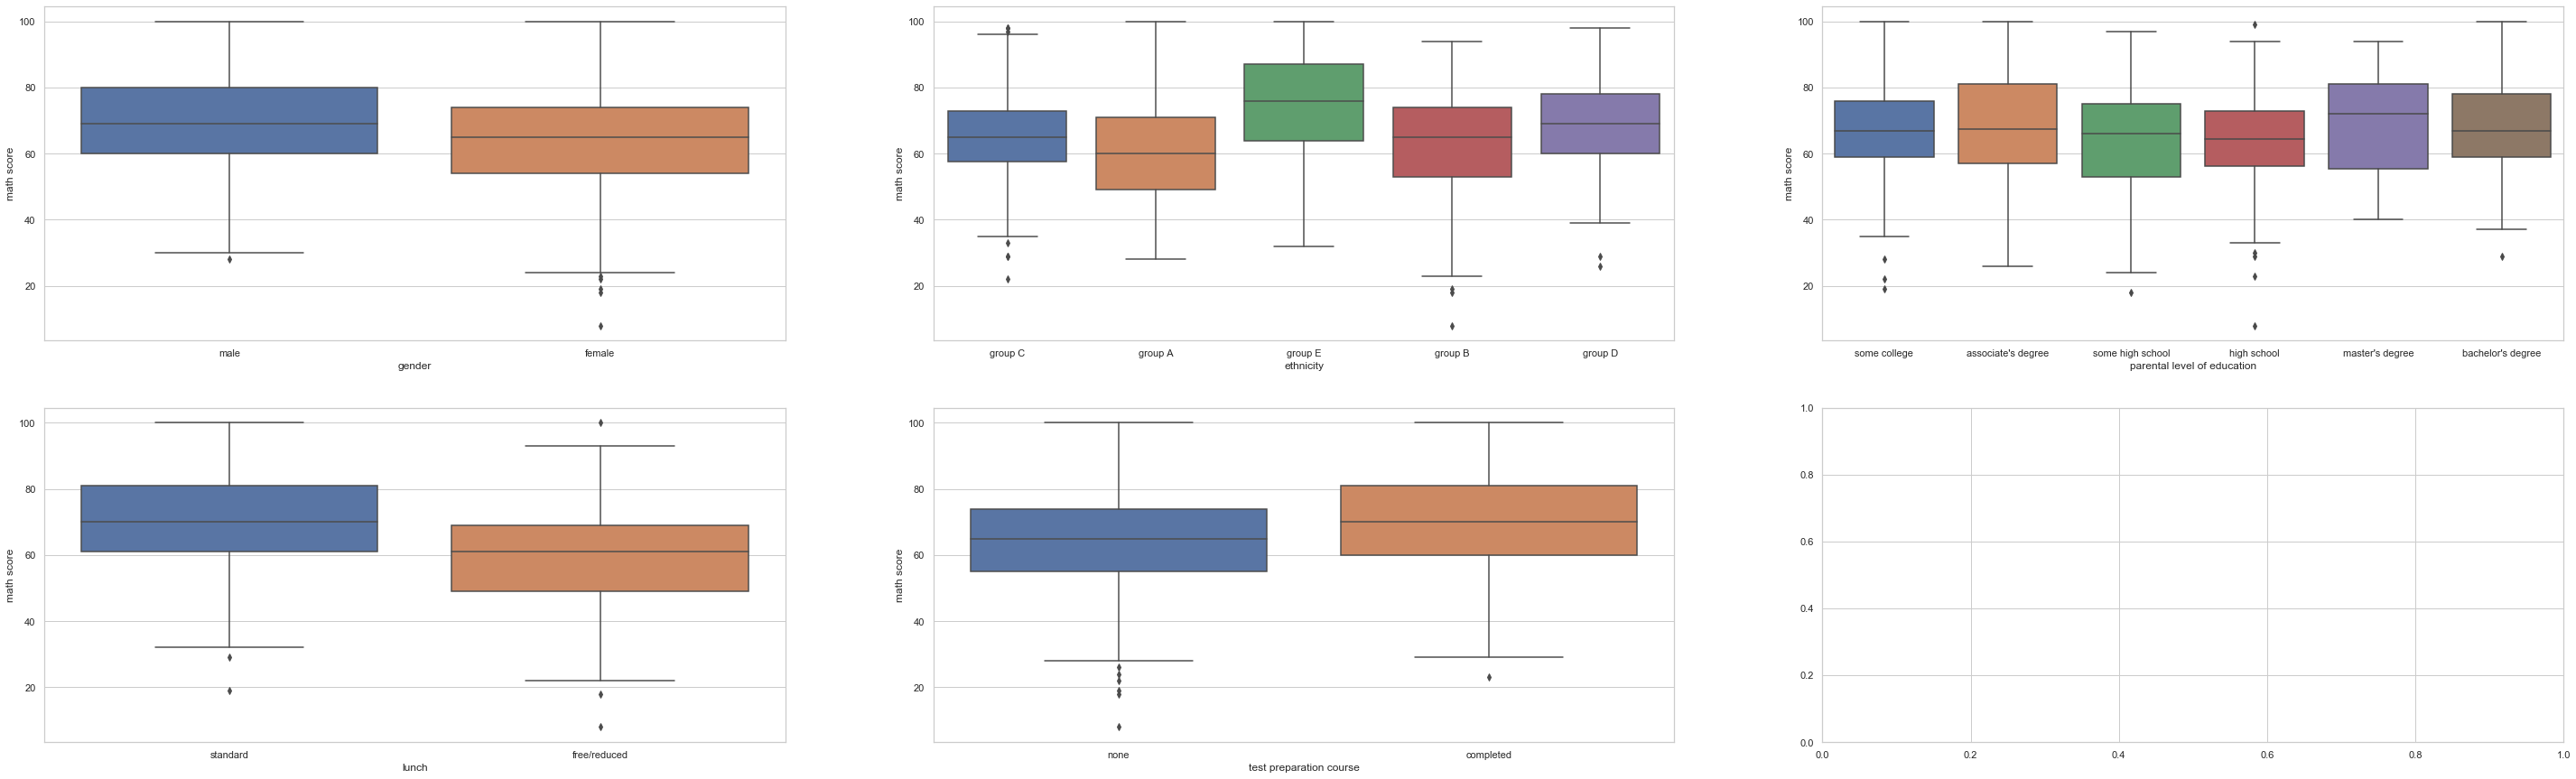

In [220]:
f, ax = plt.subplots(2, 3, figsize = (50, 15))
axx = ax.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(train[col],train[target], ax = axx[i])

### Insights

1. Group E have higher math score.
2. Group A have lowest math score w.r.t. Parental education.
3. Group A have lowest math score w.r.t. Parental education.
4. Parental education "Masters" have very few samples of Group A.
5. Lunch "Free Reduced" is always lower than Standard. 

**Catplots for Numerical Variables**

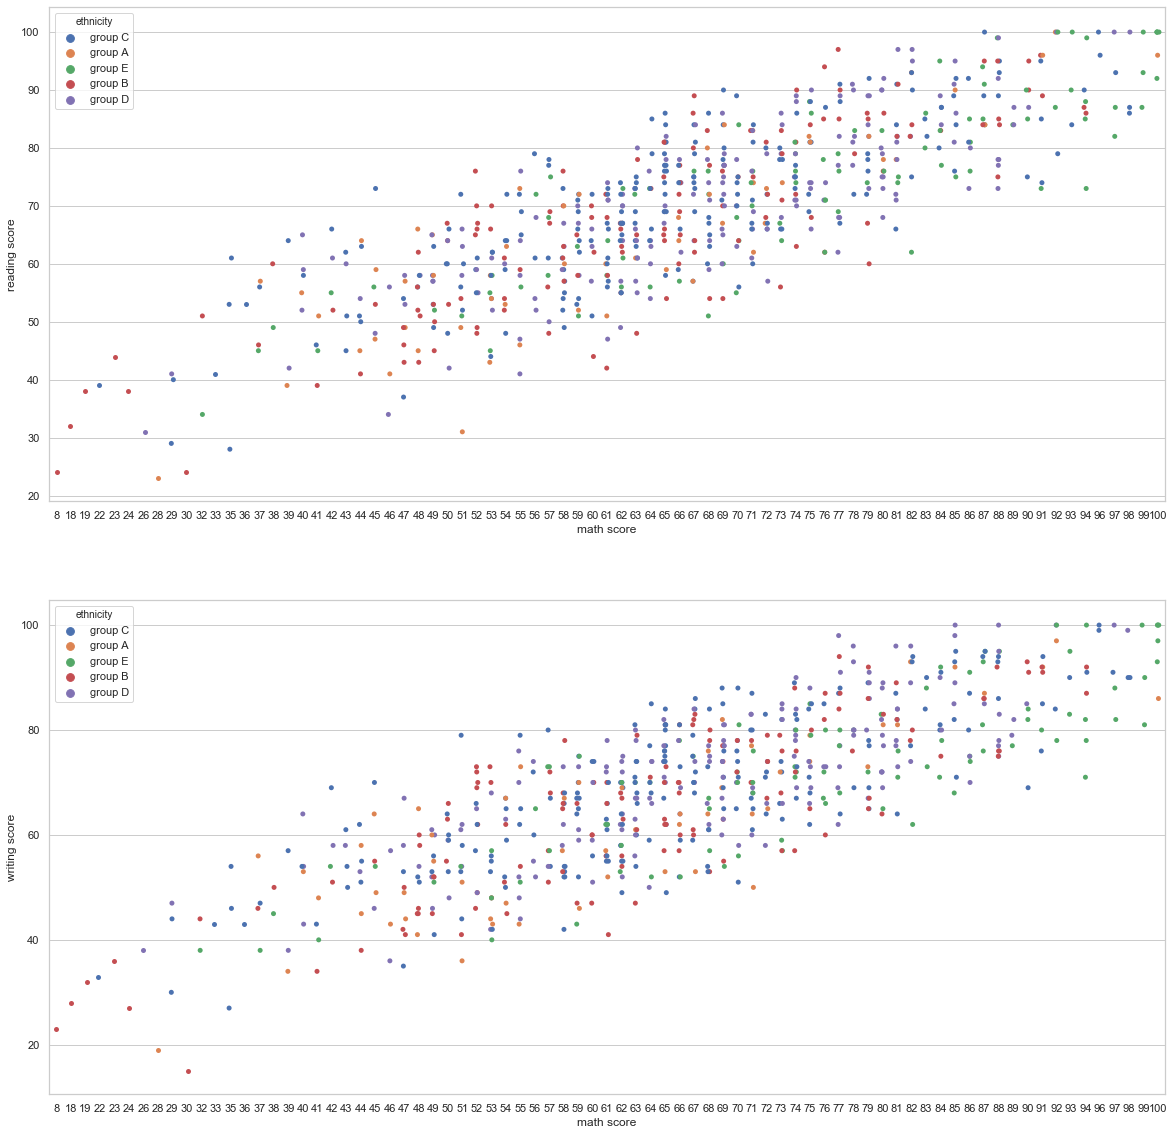

In [226]:
f, ax = plt.subplots(2, 1, figsize = (20, 20))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.stripplot(x = target, y = col, data = train, hue = 'ethnicity',ax = axx[index])

#sns.catplot(x = target, y = 'Trip_Distance', data = train, hue = 'Type_of_Cab')

---
# Hypothesis Testing

**1. Where the test_score is completed, the math score is high.**

**2. If the parent education is high, math score is high.**

**3. If reading and writing scores are above 75, then math score is above 75.**

**4. If lunch is standard, the math score is high.**

**5. Group A---> High Score --------> Group E---> Least Score. i.e. A>B>C>D>E.**

**6. Median math score of Male is greater than Female.**

**1. Where the test_score is completed, the math score is high.**

Yes. 

In [273]:
train.groupby('test preparation course')['math score'].mean()

test preparation course
completed    70.262295
none         64.399123
Name: math score, dtype: float64

**2. If the parent education is high, math score is high.**

Yes. Master's Degree have highest median score.

In [278]:
train.groupby('parental level of education')['math score'].median()

parental level of education
associate's degree    67.5
bachelor's degree     67.0
high school           64.5
master's degree       72.0
some college          67.0
some high school      66.0
Name: math score, dtype: float64

**3. If reading and writing scores are above 80, then math score is above 80.**

No. It's not the case for all students. But the median score is 84.

In [294]:
train[ (train['reading score']>80) & (train['writing score'] > 80) & (train['math score'] < 80)].head()#['math score'].median()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
15,female,group C,some college,standard,completed,89,88,70
30,female,group D,some college,free/reduced,none,89,86,79
32,female,group B,high school,free/reduced,completed,85,82,76
34,female,group B,associate's degree,free/reduced,completed,94,87,76
58,male,group B,some high school,standard,completed,85,86,79


**4. If lunch is standard, the math score is high.**

Yes.

In [295]:
train.groupby('lunch')['math score'].median()

lunch
free/reduced    61
standard        70
Name: math score, dtype: int64

**5. Group A---> High Score --------> Group E---> Least Score. i.e. A>B>C>D>E.**

No. E>D>C>B>A.

In [297]:
train.groupby('ethnicity')['math score'].mean()

ethnicity
group A    61.241379
group B    63.127660
group C    65.018265
group D    67.815217
group E    74.897959
Name: math score, dtype: float64

**6. Median math score of Male is greater than Female.**

Yes.

In [298]:
train.groupby('gender')['math score'].median()

gender
female    65
male      69
Name: math score, dtype: int64

---
# Rule Based Classifier

In [312]:
def rule_based(x):
    dictionary = train.groupby(['ethnicity', 'parental level of education', 'test preparation course', 'lunch'])['math score'].median().to_dict()
    try:
        return dictionary[(x['ethnicity'], x['parental level of education'], x['test preparation course'], x['lunch'])]
    except:
        pass
    dictionary_2 = train.groupby(['ethnicity', 'parental level of education', 'test preparation course'])['math score'].median().to_dict()
    return dictionary_2[(x['ethnicity'], x['parental level of education'], x['test preparation course'])]

In [313]:
test['math score'] = test.apply(lambda x: rule_based(x), axis = 1)

In [315]:
sample_sub['math score'] = np.round(test['math score'])
sample_sub.to_csv(sub_path + '\\sub1.csv', index=False)